<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contextual-Multi-Armed-Bandits-with-Constraints" data-toc-modified-id="Contextual-Multi-Armed-Bandits-with-Constraints-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contextual Multi Armed Bandits with Constraints</a></span><ul class="toc-item"><li><span><a href="#Matching-patients-to-providers" data-toc-modified-id="Matching-patients-to-providers-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Matching patients to providers</a></span></li><li><span><a href="#Satisfying-Constraints-with-a-Perfect-Oracle" data-toc-modified-id="Satisfying-Constraints-with-a-Perfect-Oracle-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Satisfying Constraints with a Perfect Oracle</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Example:" data-toc-modified-id="Example:-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Example:</a></span></li></ul></li><li><span><a href="#Linear-Optimization-without-Assignment" data-toc-modified-id="Linear-Optimization-without-Assignment-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Linear Optimization without Assignment</a></span></li><li><span><a href="#Formulation" data-toc-modified-id="Formulation-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Formulation</a></span><ul class="toc-item"><li><span><a href="#Classic-Binary-Optimization" data-toc-modified-id="Classic-Binary-Optimization-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Classic Binary Optimization</a></span></li><li><span><a href="#Linear-optimization-w/o-assignment" data-toc-modified-id="Linear-optimization-w/o-assignment-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>Linear optimization w/o assignment</a></span></li><li><span><a href="#Convert-quadratic-to-linear-using-a-trick-(Mccormick-Envelopes?)" data-toc-modified-id="Convert-quadratic-to-linear-using-a-trick-(Mccormick-Envelopes?)-1.2.2.3"><span class="toc-item-num">1.2.2.3&nbsp;&nbsp;</span>Convert quadratic to linear using a trick (Mccormick Envelopes?)</a></span></li><li><span><a href="#Final-Formulation" data-toc-modified-id="Final-Formulation-1.2.2.4"><span class="toc-item-num">1.2.2.4&nbsp;&nbsp;</span>Final Formulation</a></span></li></ul></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#Generate-dummy-data" data-toc-modified-id="Generate-dummy-data-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>Generate dummy data</a></span></li><li><span><a href="#Dummy-Data-with-maximums-and-minimums" data-toc-modified-id="Dummy-Data-with-maximums-and-minimums-1.2.3.2"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>Dummy Data with maximums and minimums</a></span></li><li><span><a href="#Optimization-function" data-toc-modified-id="Optimization-function-1.2.3.3"><span class="toc-item-num">1.2.3.3&nbsp;&nbsp;</span>Optimization function</a></span></li><li><span><a href="#Run-Simulation" data-toc-modified-id="Run-Simulation-1.2.3.4"><span class="toc-item-num">1.2.3.4&nbsp;&nbsp;</span>Run Simulation</a></span></li></ul></li><li><span><a href="#Lift-over-greedy-algorithm" data-toc-modified-id="Lift-over-greedy-algorithm-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Lift over greedy algorithm</a></span><ul class="toc-item"><li><span><a href="#Expected-number-of-appointments-of-the-linear-optimizer" data-toc-modified-id="Expected-number-of-appointments-of-the-linear-optimizer-1.2.4.1"><span class="toc-item-num">1.2.4.1&nbsp;&nbsp;</span>Expected number of appointments of the linear optimizer</a></span></li><li><span><a href="#Expected-number-of-appointments-of-greedy-algorithm" data-toc-modified-id="Expected-number-of-appointments-of-greedy-algorithm-1.2.4.2"><span class="toc-item-num">1.2.4.2&nbsp;&nbsp;</span>Expected number of appointments of greedy algorithm</a></span></li></ul></li><li><span><a href="#Test-on-unseen-data-with-noise" data-toc-modified-id="Test-on-unseen-data-with-noise-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Test on unseen data with noise</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li></ul></div>

# Contextual Multi Armed Bandits with Constraints

Multi-armed bandits (MAB) is a classic formulation of the exploration versus exploitation problem - 
It is a hypothetical experiment where a bandit must choose between multiple slot machines,
each with an unknown payout. More background on the problem can be found here: [1](https://en.wikipedia.org/wiki/Multi-armed_bandit), [2](https://lilianweng.github.io/lil-log/2018/01/23/the-multi-armed-bandit-problem-and-its-solutions.html)

Contextual MAB is an extension of this approach where we factor in the bandit’s environment, or context, when choosing an action. For the scope of this problem, we are going to reduce the contextual bandit problem into a supervised learning problem, where an "oracle" takes into account the context and gives us a score that indicates the probability of success on the next action.



## Matching Patients to Providers

One real-world application of contextual MAB problem in healthcare is sending patient referrals to a network of mental health providers (MHPs). Let's consider a patient referral system that matches a new patient with the "best" available MHP. The system does not have access to real-time availability of the MHP, but it knows the number of new patients the MHP can generally take week over week. This is the maximum number of referrals a MHP can have (1). Similarly, the MHP expects a minimum number of referrals every week, to keep them engaged on the system, and that sets a minimum constraint on the number of referrals (2). 
When a patient is considered for a provider, there is a lot of information that could be used to make a successful match. Patients have conditions that they seek treatments for, and they might have preferences on gender, race, age, specialization etc of the provider. Similarly, the system has data on the provider's history in declining and scheduling referrals. This information containing patient's preferences and provider's history, constitutes the "context" for the problem (3). 
All three of these together make this use-case equivalent to a contextual MAB problem with minimum and maximum constraints:
- A patient referral can be thought of as "playing" a machine; similarly, MHPs are slot machines. 
- The payout of a slot machine is equivalent to the inherent "scheduling rate" of a MHP. Scheduling rate of a MHP is the proportion of the received referrals scheduled for an appointment.
- The inherent scheduling rate varies over time, but we will assume that it remains nearly the same if we manage to honor the maximum and minimum constraints. A MHP will remain happy if they get a minimum number of referrals each week, and not more than the maximum they want. If we don't honor the constraints, the MHP might become disengaged and stop accepting the referrals
- New providers are on-boarded on the system often, which makes exploration a consistent part of the system. 
- Even though MHPs have an "inherent" scheduling rate, it is common for their rate to vary over time due to staffing changes, seasonal variation, business changes etc. 

Unlike the goal of a typical MAB problem, where the goal is to lower "regret", or the difference between an optimal solution and your solution, this system's goal is to optimize the total number of appointments scheduled by the system, across all MHPs.

Referrals are sent out in real-time, which means we cannot do a batch assignment, and that makes this problem tricky.

## Satisfying Constraints with a Perfect Oracle

For the scope of this solution, we are only going to focus on the constraint satisfaction problem. For simplicity, we assume an oracle that accurately predicts the likelihood of success if a patient is sent to a MHP. This oracle, in practice, is a well-calibrated supervised learning algorithm that predicts the odds that a referral will get scheduled if we send it to a given MHP. 

This formulation violates the standard MAB problem– where the focus is on minimizing regret. One might argue that this is not a classic MAB problem anymore;
Before implementing this solution, we used the classic solution for the MAB problem of Thompson sampling [1](https://en.wikipedia.org/wiki/Thompson_sampling) that minimizes regret. However, we realized that minimizing regret is not an issue at all. On the contrary, we found that greedy algorithms that usually have higher regret bounds or no bound at all do just as well as Thompson sampling for this use-case, because recently onboarded MHPs are eager to schedule referrals; but as time passes, failure to maintain constraints leads to their dissatisfaction and a drop in their "payout" aka scheduling rate. Also, Thompson sampling does not allow us to put constraints on the MHPs. The oracle, which is a supervised learning algorithm, uses context for new MHPs to predict their success rate quite well, and it reduced our concern for exploration and regret.

So, this problem can be simplified into the following:
- A system consists of sending m referrals to n MHPs
- An oracle gives likelihood for each referral-MHP pair
– MHPs have an inherent/true scheduling rate
- Each MHP has a maximum and minimum constraint on the number of referrals they can receive

The simplest solution to this problem could be to use a greedy algorithm for sending a referral to a MHP. For any given referral, we will send it to the MHP with the highest payout, but then, there is no
guarantee that it will satisfy the minimum and maximum constraints. Let's consider an example to understand the problem: 

#### Example:

Let's consider a provider MHP1 which is nearing its maximum quota/cap, but is not full yet. Let's say we can only send them two more referrals this week, but they end up being the top pick for four referrals. How do we decide which two to send?

Let's say the referrals, oracle scores, and MHPs look like this:
    
   |    |mhp1 | mhp2 | mhp3|
   |----|-----|------|-----|
   | r1 | 0.7 | 0.65 | 0.2 |
   | r2 | 0.8 | 0.7  | 0.75|
   | r3 | 0.9 | 0.2  | 0.1 |
   | r4 | 0.7 | 0.24 | 0.3 |

<b>Strategy 1 </b>

We suspend the MHP after the quota is met - after the first two referrals in this case. 
That means: 
- r1 and r2 are sent to MHP1 and 
- r3 is sent to MHP2 
- r4 is sent to MHP3
    
What are the expected number of appointments in this case? Assuming that the scores from the oracle are true probabilities.<br/>
Expected number of appointments = 0.7 + 0.8 + 0.2 + 0.3 = 2

<b>Strategy 2</b>

- r3 and r4 appointments to mhp1 instead
- r1 to mhp2
- r2 to mhp3
   
Expected number of appointments = 0.65 + 0.75 + 0.9 + 0.7 = 3 <br/>
So, a slightly different strategy resulted in one extra appointment in this group. This shows that a greedy approach might not be the best approach here.

In this case, we can easily see which two referrals to route to MHP1 because we can see all the referrals. Unfortunately, in production, the referrals are sent in real-time, as they come, and we have no information about the future. So, when deciding for r1, we do not know about r2, r3 and r4. We still want to try and optimize the total number of appointments. But how?

### Linear Optimization without Assignment
It is clear that we have reduced this to a standard linear optimization problem: it has an objective function (expected number of appointments), a cost function (scores) and constraints to satisfy. But there is one issue - we cannot send referrals in batches. They are sent in real-time as soon as a patient is received by the system.

This means that we cannot do "assignment" like a typical linear optimization problem. This notebook describes a solution that using linear optimization for this problem without assignment by using score adjustments 


### Formulation

#### Classic Binary Optimization

Let's assume we could batch referrals, what would the solution look like?

Let's say there are N MHPs, R referrals, this algorithm gives a probability score for each referral

Maximum volume: $q_{0}, q_{1}, q_{2} ... q_{N}$

Minimum volume: $ p_{0}, p_{1}  ... p_{N}$ 

Let's consider the score matrix 



   |     |mhp1| mhp2|mhp3| ... |
   |---- |-----|------|-----|-----|
   | p0  | 0.7 | 0.64 | 0.1 | ... |
   | p1  | 0.8 | 0.58  | 0.32| ... |
   | p2  | 0.91 | 0.35 | 0.3 | ... |
   | ... | ... | ...  | ... | ... |


For example, $s_{01} = 0.64$ , $s_{22} = 0.35$ 


Assignment Matrix:

   |     |mhp1| mhp2|mhp3| ... |
   |---- |-----|------|-----|-----|
   | p1  |  0  |   1  |  0  | ... |
   | p2  |  0  |   0  |  1  | ... |
   | p3  |  1  |   0  |  0  | ... |
   | p4  |  1  |   0  |  0  | ... |
   | ... | ... | ...  | ... | ... |
   
<b>Formulation </b>:
    
$$ \max_{a} \sum \sum a_{ij} s_{ij}$$

    
$$ \sum_i a_{ij} < d_j  \qquad \forall  j $$

$$ \sum_i a_{ij} > c_j  \qquad \forall  j $$
    
$$ \sum_j a_{ij} = 1  \qquad \forall  i $$
    

So far so good, but this formulation is not very useful because we cannot send referrals to providers in batches. In the absence of assignments, we use compute score adjustments, which are listed below: 


#### Linear optimization w/o assignment

We force assignment to be on the maximum score per referral, which makes it a purely endogenous variable - as opposed to a decision variable. <br/>
We introduce a new set of decision variables $P$ (for score adjustments) such that $P_j$ is the score adjustment (boost + or penalty -) for each MHP $M_j$


   | j  |---> |      |     |     |
   |----|-----|------|-----|-----|
   | p  | 0.7 | 0.64 | 0.1 | ... |

<b>Formulation </b>:

$$ \max_{a} \sum \sum a_{ij} s_{ij}$$

    
$$ \sum_i a_{ij} < d_j  \qquad \forall  j $$
    
$$ \sum_i a_{ij} > c_j  \qquad \forall  j $$

$$ \sum_j a_{ij} = 1  \qquad \forall  i $$

$$ s_{ij} + r_j \leq \sum_k a_{ik} (s_{ik} + r_k)  \qquad \forall  i \forall  j $$


There is a problem with the last equation. <br/>

It is not linear!


#### Convert Quadratic to Linear Using a Trick: McCormick Envelopes

$ z = xy $ 
where x is binary and y is continuous

$ L \leq y \leq U $ 
where L and U are bounds on y

Then the following constraints will make it linear

$$ z \leq Ux$$
$$ z \geq Lx$$
$$ z \leq y - L(1-x) $$
$$ z \geq y - U(1-x) $$


#### Final Formulation


$$ \max_{a} \sum \sum a_{ij} s_{ij} - (\sum abs (p_{j})) $$

    
$$ \sum_i a_{ij} < d_j  \qquad \forall  j $$

$$ \sum_i a_{ij} > c_j  \qquad \forall  j $$

$$ \sum_j a_{ij} = 1  \qquad \forall  i $$

$$ s_{ij} + p_j \leq \sum_k a_{ik} s_{ik} + \sum_k z_{ik}   \qquad \forall  i  \forall  j$$


$$ z_{ik} = a_{ik} p_k $$

$$ -a_{ik} \leq z_{ik} \leq a_{ik} $$

$$ r_k - (1 - a_{ik}) \leq z_{ik} \leq r_k + (1 - a_{ik}) $$


That's it! <br/> Time to code ...


In [1]:
import os

from scipy.stats import pearsonr as pearson_corr

import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

import pulp
from time import time
import seaborn as sns
from collections import namedtuple
import matplotlib.pyplot as plt
# plt.style.use(['science', 'ieee', 'no-latex'])
from copy import copy


### Simulation

####  Generate Dummy Data

In [2]:
MIN_, MAX_ = 0, None

class MHP(object):
    def __init__(self, **kwargs):
        # name, mu, sigma, null_frac, maximum, minimum
        self.__dict__.update(kwargs)

def generate_maximums(n_referrals, n_mhps, max_frac):
    mean_cap = int(n_referrals/n_mhps*max_frac)
    caps = np.random.normal(mean_cap, int(mean_cap/2), n_mhps)
    caps = [int(max(10, x//5*5)) for x in caps]
    caps[0] = MAX_  # first two providers are not capped
    caps[1] = MAX_
    return caps


def generate_minimums(maximums, n_mhps):
    # randomly pick providers to be boosted with about 60 % probability
    boosted = (np.random.uniform(0, 1, n_mhps) > 0.4).astype(int)
    mins = [int(maximums[i] / 2.0)//5*5 if (boosted[i] and maximums[i] is not None)
            else 0 for i in range(n_mhps)]
    mins[0] = None  # first two providers are hardcoded for control
    mins[1] = 0
    return mins
    
def generate_mhp_params(n_referrals, n_mhps, max_frac=0.6):
    # base scheduling rates 
    mus = np.random.uniform(0.1, 0.7, n_mhps)
    sigmas = np.random.uniform(0.1, 0.4, n_mhps) # standard deviation for probability scores
    null_frac = np.random.uniform(0.2, 0.7, n_mhps) # Number of nans
    maximums = generate_maximums(n_referrals, n_mhps, max_frac)
    minimums = generate_minimums(maximums, n_mhps)
    mhps = [MHP(name="mhp_%d" % i, mu=mus[i], sigma=sigmas[i], null_frac=null_frac[i], 
                maximum=maximums[i], minimum=minimums[i]) 
            for i in range(n_mhps)]                
    return mhps

def generate_referral_data(n_referrals, mhps, verbose=False):
    n_mhps = len(mhps)
    df = pd.DataFrame({
        mhp.name: np.random.normal(mhp.mu, mhp.sigma, n_referrals) for mhp in mhps
    })
    # Introduce nulls because not all provideres are always eligible
    for i, col in enumerate(df.columns):
        frac = mhps[i].null_frac
        df.loc[df.sample(frac=frac).index, col] = np.nan
        
    # If a row is completely empty (all nans), refill it with some positives
    for i in range(len(df)):
        if df.iloc[i].notnull().sum() == 0:
            if verbose:
                print("Reviving row %d containing all nans" % i)
            df.loc[i, "mhp_%d" % np.random.randint(n_mhps)] = np.random.uniform(0.2, 0.3)
            
    df[df < 0.0] = 0.01  # Replace negative values with a low value
    df[df > 1] = 1.0  # Replace values greater than 1.0 with 1.0
            
    return df

def generate_data(n_referrals, n_mhps, max_frac=0.6):
    mhps = generate_mhp_params(n_referrals, n_mhps, max_frac)    
    df = generate_referral_data(n_referrals, mhps)
    return df, mhps

def generate_test_data(n_referrals, mhps, noise=0.001, verbose=True):
    mhps_new = copy(mhps)
    for mhp in mhps_new:
        mhp.mu = mhp.mu + np.random.normal(0, noise)
        mhp.sigma = mhp.sigma + np.random.normal(0, noise)
    
    df = generate_referral_data(n_referrals, mhps_new, verbose=verbose)
    return df


df, mhps = generate_data(n_referrals=500, n_mhps=10)
mhp_names = [mhp.name for mhp in mhps]

df.head()

,mhp_0,mhp_1,mhp_2,mhp_3,mhp_4,mhp_5,mhp_6,mhp_7,mhp_8,mhp_9
0,NaN,NaN,0.251907,0.010000,0.01,0.776450,NaN,NaN,0.505274,0.627337
1,0.499344,0.558556,0.345212,0.360091,NaN,NaN,NaN,0.687401,0.444599,0.721561
2,NaN,0.433637,NaN,NaN,NaN,0.900219,NaN,NaN,0.468380,NaN
3,0.428001,0.735467,0.392052,NaN,NaN,NaN,0.35046,0.703227,NaN,0.421695
4,0.708817,0.526371,NaN,0.430724,1.00,1.000000,NaN,NaN,NaN,0.355397


#### Average number of referrals per MHP

count    500.00000
mean       5.34400
std        1.50139
min        1.00000
25%        4.00000
50%        5.00000
75%        6.00000
max        9.00000
dtype: float64


<AxesSubplot:ylabel='Density'>

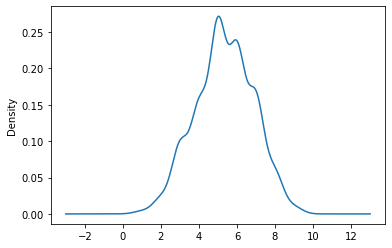

In [3]:
print(df.notnull().sum(axis=1).describe())
df.notnull().sum(axis=1).plot.density()

####  Dummy Data with Maximums and Minimums

In this section, we demonstrate the total referrals that an MHP would receive with a greedy strategy.
- "current_referrals" is the count the MHP would get with greedy
- "minimum" and "maximums" are the constraints set on them

In [4]:
def get_summary_df(df, mhps):
    df_vol = pd.DataFrame({
        "mean": df.mean().round(2),
        "std_deviation": df.std().round(2),
        "null_fraction": [mhp.null_frac.round(2) for mhp in mhps],
        "current_referrals": df.idxmax(axis=1).value_counts(),
        "minimums": [mhp.minimum for mhp in mhps],
        "maximums": [mhp.maximum for mhp in mhps],
        }, index=[mhp.name for mhp in mhps])  # .fillna(0)

    df_vol['current_referrals'] = df_vol.current_referrals.fillna(0).astype(int)
    return df_vol

get_summary_df(df, mhps)

,mean,std_deviation,null_fraction,current_referrals,minimums,maximums
mhp_0,0.49,0.14,0.30,38,NaN,NaN
mhp_1,0.46,0.18,0.46,35,0.0,NaN
mhp_2,0.27,0.13,0.64,0,20.0,40.0
mhp_3,0.39,0.28,0.54,34,0.0,10.0
mhp_4,0.48,0.30,0.50,66,0.0,15.0
mhp_5,0.63,0.28,0.39,126,5.0,10.0
mhp_6,0.59,0.15,0.65,39,0.0,40.0
mhp_7,0.41,0.29,0.61,34,0.0,40.0
mhp_8,0.53,0.19,0.23,87,15.0,30.0
mhp_9,0.42,0.24,0.35,41,10.0,20.0


#### Optimization Function

We use Pulp to code the optimizer formulated above.

In [5]:
class LinOp(object):
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
        
def run_linear_optimization(df, maximums, minimums, compute_adjustments, verbose=True):
    N_REFERRALS, N_MHPS = df.shape
    st = time()
    
    scores = df.values
    prob = pulp.LpProblem("network_optimization_%s" % compute_adjustments, pulp.LpMaximize)

    adjustment = pulp.LpVariable.dicts("adjustment", range(N_MHPS), lowBound=-1, upBound=1, cat='Continuous')
    adj_abs = pulp.LpVariable.dicts("adjustment_absolute", range(N_MHPS), lowBound=0, upBound=1, cat='Continuous')
    
    z_dummy = pulp.LpVariable.dicts("z_dummy", [(i, j) for i in range(N_REFERRALS) for j in range(N_MHPS)], -1, 1, cat='Continuous')

    assignment = pulp.LpVariable.dicts("assignment", [(i,j) for i in range(N_REFERRALS) for j in range(N_MHPS)], 0, 1, cat='Integer')

    # The objective function is added to 'prob' first
    prob += pulp.lpSum([assignment[i, j]*scores[i, j] for i in range(N_REFERRALS) for j in range(N_MHPS) if pd.notnull(scores[i, j])]) , "expected_appts"
    
    # Constraints
    # 1. Only one MHP assignment per referral 
    for i in range(N_REFERRALS):
        prob += pulp.lpSum([assignment[i, j] for j in range(N_MHPS) if pd.notnull(scores[i, j])]) == 1.0, "assignment_sum_%d" % i

    # 2. Maximums
    for j in range(N_MHPS):
        if pd.notnull(maximums[j]):
            prob += pulp.lpSum([assignment[i, j] for i in range(N_REFERRALS) if pd.notnull(scores[i, j])]) <= maximums[j]
        
    # 3. Minimums
    for j in range(N_MHPS):
        n_referrals_for_mhp = (scores[:, j] >= 0).sum()
        if pd.notnull(minimums[j]) and (n_referrals_for_mhp > 0):
            # find the minimum referrals they are eligible for            
            lower_bound = min(minimums[j], n_referrals_for_mhp)
            if pd.notnull(maximums[j]):  # lower_bound should not be too close to upper bound
                lower_bound = min(lower_bound, int(maximums[j]*0.7))
            prob += pulp.lpSum([assignment[i, j] for i in range(N_REFERRALS) if pd.notnull(scores[i, j])]) >= lower_bound        

    for j in range(N_MHPS):
        # adjustment[j].setInitialValue(0)
        if pd.isnull(minimums[j]):
            adjustment[j].upBound = 0
            
        if pd.isnull(maximums[j]):
            adjustment[j].lowBound = 0

        # no constraints for MHPs without limits
        if pd.isnull(minimums[j]) and pd.isnull(maximums[j]):
            adj_abs[j].upBound = 0
            adj_abs[j].lowBound = 0
            
    if compute_adjustments:
        for i in range(N_REFERRALS):
            for j in range(N_MHPS):
                if pd.isnull(scores[i, j]):
                    assignment[i, j].lowBound = 0
                    assignment[i, j].upBound = 0
                    z_dummy[i, j].lowBound = 0
                    z_dummy[i, j].upBound = 0

                if pd.isnull(minimums[j]) and pd.isnull(maximums[j]): # no constraints for MHPs without limits
                    z_dummy[i, j].lowBound = 0
                    z_dummy[i, j].upBound = 0
       
        # 4. Assignment should only happen to the maximum score after applying the adjustment
        for i in range(N_REFERRALS):

            # Trick to turn quadratic (assignment * adjustment) into Linear
            for k in range(N_MHPS): 
                U = 1  # 0 if minimums[k] is None else 1
                L = -1 # 0 if maximums[k] is None else -1

                if pd.isnull(scores[i, k]):
                    continue
                if pd.isnull(minimums[k]) and pd.isnull(maximums[k]): # no constraints for MHPs without limits
                    continue               

                prob += z_dummy[i, k] <= U * assignment[i, k]
                prob += z_dummy[i, k] >= L * assignment[i, k]
                prob += z_dummy[i, k] <= adjustment[k] - L *(1 - assignment[i, k])
                prob += z_dummy[i, k] >= adjustment[k] - U * (1 - assignment[i, k])

            for j in range(N_MHPS):                
                # <= (pulp.lpSum([assignment[i, k] * (scores[i, k] + adjustment[j]) for k in range(N_MHPS)]) 
                # Ideally you want this ^ , but it is quadratic, so introducing a dummy variable z_dummy
                if pd.isnull(scores[i, j]):
                    continue
                prob += (scores[i, j] + adjustment[j]) <= (pulp.lpSum([assignment[i, k] * scores[i, k] 
                                                                       for k in range(N_MHPS) if pd.notnull(scores[i, k])]) +
                                                           pulp.lpSum([z_dummy[i, k] for k in range(N_MHPS)]))
                                                

    # print("Optimization Initialized in %.2f seconds" % (time() - st))
    pulp.list_solvers(onlyAvailable=True)
    prob.solve(pulp.PULP_CBC_CMD(gapRel=0.1, timeLimit=600))
    # prob.solve(pulp.PULP_CBC_CMD(timeLimit=10, msg=1, gapRel=0.1, logPath="/tmp/pulp.log"))
    # prob.solve(pulp.CPLEX_PY())

    run_time = time() - st
    status = pulp.LpStatus[prob.status]    
    objective = pulp.value(prob.objective)
    max_objective = df.max(axis=1).sum()

    columns = df.columns.to_list()
    adjustment = [adjustment[j].varValue for j in range(N_MHPS)]
    assignment = [j  
                  for i in range(N_REFERRALS) 
                  for j in range(N_MHPS) if assignment[i, j].varValue == 1]  
    
    result = LinOp(adjustment=adjustment, assignment=assignment, status=status, 
                   run_time=run_time, objective=objective, prop_maximum=objective / max_objective) 
    if verbose:
        print("Value of objective: %.2f" % result.objective)
        print("Maximum possible objective: %d" % max_objective)
        print("Proportion of maximum: %.2f" % result.prop_maximum)
        print("Optimizer finished in %.2f seconds with status %s" % (run_time, status))

    return result


#### Run Simulation

Let's send the referral data through the optimizer and look at the results

In [6]:
def train_boostrap(df, mhps, compute_adjustments, verbose=True, n_trials=10):
    print("Runnign boostrap with %d trials" % n_trials)
    mhps_new = copy(mhps)
    d_adjustments = {}    
    for i in range(n_trials):
        if i % 20 == 0:
            print("running trial %d" % i)
        df_test = generate_test_data(len(df), mhps_new, noise=0.0, verbose=verbose)
        df_results , _ = train(df_test, mhps_new, compute_adjustments=True, verbose=verbose)
        d_adjustments.update({'trial_%d' % i: df_results.adjustment})
    return pd.DataFrame(d_adjustments)

def train(df, mhps, compute_adjustments, verbose=True):
    n_referrals, n_mhps = df.shape
    minimums = [mhp.minimum for mhp in mhps]
    maximums = [mhp.maximum for mhp in mhps]
    
    solver = run_linear_optimization(df, maximums, minimums, compute_adjustments, verbose)
    df_results = get_summary_df(df, mhps)    
    
    if compute_adjustments:
        df_new = df.copy(deep=True)
        for i in range(n_mhps):
            col = mhps[i].name
            df_new[col] = (df_new[col] + solver.adjustment[i])
            
        exp_appts = 0
        for i in range(n_referrals):
            row = df_new.iloc[i]
            idxmax_adjusted = row.idxmax()
            exp_appts += df[idxmax_adjusted].iloc[i]
            
        if verbose:
            print("Expected appointments by adjustment: %d" % exp_appts)
        df_results['new_referrals_using_adjustment'] = df_new.idxmax(axis=1).value_counts()
        df_results['adjustment'] = pd.Series({mhps[i].name: solver.adjustment[i] for i in range(n_mhps)})

    else:
   
        assigned_score = [df.iloc[i, solver.assignment[i]] for i in range(n_referrals)] 
        exp_appts = sum(assigned_score)
        df_results["new_referrals_using_assignment"] = pd.value_counts(solver.assignment)
        if verbose:
            print("Expected appointments by assignment: %d" % exp_appts)
    
    solver.expected_appointments = exp_appts   
    return df_results, solver
        
    # Note - the new counts of referrals using adjustment should be exactly the same
    # as the counts with assignment (decision variable), because assignment of a referral 
    # happens to the MHP with maximum `score + adjustment` for the given referral


# This loop just looks for a good example of adjustments to show. We could have just run it once
# but the adjustments are not always a good demonstration of the loadbalancer, so we run it multiple
# times and break when we have a good example. A "good" example in this case is set to be a run with
# two positive and two negative adjusments.
for i in range(100):
    df, mhps = generate_data(n_referrals=500, n_mhps=8, max_frac=1.0)
    df_results, solver = train(df, mhps, compute_adjustments=True, verbose=False)
    df_results["adjustment"] = df_results.adjustment.round(2)
    if (df_results.adjustment > 0.1).sum() in [2, 3] and (df_results.adjustment < -0.1).sum() in [2, 3]:
        df_results.to_csv("~/Documents/training_adjustments.csv")
        break

In [7]:
df_results

,mean,std_deviation,null_fraction,current_referrals,minimums,maximums,new_referrals_using_adjustment,adjustment
mhp_0,0.20,0.14,0.45,6,NaN,NaN,13,0.00
mhp_1,0.57,0.17,0.60,58,0.0,NaN,93,0.01
mhp_2,0.32,0.27,0.68,21,55.0,110.0,54,0.16
mhp_3,0.18,0.16,0.67,4,40.0,85.0,42,0.25
mhp_4,0.62,0.30,0.33,192,0.0,150.0,149,-0.17
mhp_5,0.34,0.29,0.38,51,40.0,85.0,74,0.00
mhp_6,0.47,0.32,0.36,92,30.0,60.0,61,-0.27
mhp_7,0.45,0.26,0.34,76,5.0,15.0,14,-0.43


*The optimizer works !*

As we can see here, the adjustments change the number of referrals received by MHPs. For example, mhp_5 was naturally receiving 117 referrals, but its maximum capacity was 50. After a negative adjustment of -0.19, its volume was brought down to 50 referrals. Similarly mhp_6 was receiving 4 referrals but its minimum was 65. It received a positive adjustment of 0.52 to bring its volume up to 64. 

**This adjustment is computed on the dataset so it should give a perfect answer. Then why did mhp_6 get 64 referrals instead of 65?** <br/>
We are computing the new volume of referrals by applying adjustment on scores and picking the MHP with the maximum adjusted score. Two MHPs can have the same score after adjustment and since the tie breaking is (pseudo) random, the counts can be a bit over or under.

### Boostrap

The training adjustments overfit to the sample and to generalize them, we bootstrap the algorithm and take the median adjustment

In [8]:
df_bootstrap = train_boostrap(df, mhps, compute_adjustments=True, verbose=False, n_trials=50)
df_results["adjustment_median"] = df_bootstrap.T.median().round(2)
solver.adjustment_median = df_bootstrap.T.median()

Runnign boostrap with 50 trials
running trial 0
running trial 20
running trial 40


Boostrapping also allows us to see how stable the adjustments are.
As you can see in the plot below, the adjustments have a low variance, which means they should do quite well
on unseen data if the parameters of MHPs are nearly the same i.e if there is low concept drift in the data, the model can be used in production

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'mhp_0'),
  Text(2, 0, 'mhp_1'),
  Text(3, 0, 'mhp_2'),
  Text(4, 0, 'mhp_3'),
  Text(5, 0, 'mhp_4'),
  Text(6, 0, 'mhp_5'),
  Text(7, 0, 'mhp_6'),
  Text(8, 0, 'mhp_7')])

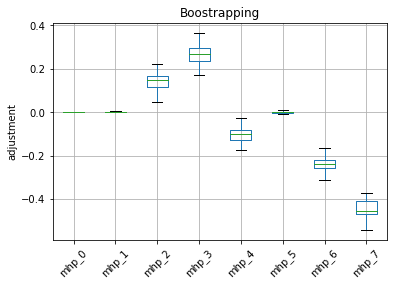

In [9]:
df_bootstrap.T.boxplot(showfliers=False)
plt.ylabel("adjustment")
plt.title("Boostrapping")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

In [10]:
df_bootstrap.T.describe()

,mhp_0,mhp_1,mhp_2,mhp_3,mhp_4,mhp_5,mhp_6,mhp_7
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,0.001957,0.140536,0.268878,-0.103687,-0.001342,-0.239021,-0.446522
std,0.0,0.004556,0.042808,0.040676,0.030341,0.006763,0.036307,0.044036
min,0.0,0.000000,0.030644,0.172038,-0.172643,-0.023332,-0.313011,-0.544818
25%,0.0,0.000000,0.116178,0.236697,-0.125912,-0.003480,-0.259259,-0.469996
50%,0.0,0.000000,0.148417,0.267602,-0.101864,0.000000,-0.239569,-0.453991
75%,0.0,0.001823,0.167368,0.298437,-0.083443,0.002497,-0.220170,-0.407419
max,0.0,0.028269,0.223647,0.366432,-0.025161,0.009533,-0.145082,-0.370014


### Optimality of adjustments
How much are we losing by using adjustments instead of assignment?
Let's run a simulation to compare runs of both.

Surprisingly, the results of both are almost exactly the same. This means that there is a one-to-one relationship between assignment and adjustments.
Note - this takes a long time to run so i don't have the results here, but the output was the same as the one we get from assignments.

In [ ]:
# note-  DO NOT RUN THIS CELL. IT TAKES FOREVER
ff = []
for i in range(8):
    n_mhps = 10*(i+1)
    df, mhps = generate_data(n_referrals=500, n_mhps=n_mhps)
    d = {"n_mhps": n_mhps}
    for rtype in ["adjustment", "assignment"]:
        _, solver = train(df, mhps, compute_adjustments=(rtype == "adjustment"), verbose=False)
        for attr in ['status', 'run_time',  'objective', 'prop_maximum', 'expected_appointments']:
            val = getattr(solver, attr)
            d["%s_%s" % (attr, rtype)] = round(val, 2) if isinstance(val, float) else val
    ff.append(d)
df_out = pd.DataFrame(ff)
df_out[sorted(df_out.columns)]

## Test on Unseen Data with Noise

### Lift Over Greedy Algorithm

#### Expected Number of Appointments of the Linear Optimizer

In [11]:
def evaluate(df, mhps, assignment, verbose, prefix):
    n_referrals = len(df)
    df_results = get_summary_df(df, mhps)    
    df_results['new_mhp_counts'] = pd.Series(assignment).value_counts()
    df_results['overdraft'] = df_results['new_mhp_counts'] - df_results['maximums']
    df_results['underdraft'] = df_results['minimums'] - df_results['new_mhp_counts']
    x, y = df_results['overdraft'], df_results['underdraft']
    expected_appts = np.nansum([df[assignment[i]].iloc[i] for i in range(n_referrals)])
    max_appts = df.max(axis=1).sum()
    output = {
        'expected_appointments': expected_appts,
        'maximum appointments': max_appts,
        'proportion_of_maximum': expected_appts/max_appts,
        'regret': max_appts - expected_appts,
        'overdraft_error': x[x > 0].sum(),
        'underdraft_error': y[y > 0].sum()        
    }
    output = {prefix + k: v for k, v in output.items()}
    
    if verbose:
        for k, v in output.items():
            print("Evaluate: %s = %.2f" % (k, v))
            
    return df_results, output

In [12]:
def test_linop(df, mhps, solver, verbose=False, stop_when_max_reached=True, use_bootstrapped_adjustment=False):
    df_new = df.copy(deep=True)
    n_referrals, n_mhps = df.shape
    maximums = {mhp.name: mhp.maximum for mhp in mhps}
    referral_counts = {mhp.name: 0 for mhp in mhps}
    
    adjustment =  solver.adjustment_median if use_bootstrapped_adjustment else solver.adjustment
    for i in range(n_mhps):
        col = mhps[i].name
        df_new[col] = (df_new[col] + adjustment[i])

    assignment = []
    for i in range(n_referrals):
        row = df_new.iloc[i]
        best_mhp = row.idxmax()  # This can be null if all MHPs are maxed out
        if pd.isnull(best_mhp):  # No MHPs available
            best_mhp = np.random.choice(row.index)  
        
        referral_counts[best_mhp] += 1                         
        assignment.append(best_mhp)
        max_for_best_mhp = maximums[best_mhp]
        
        # Even with Linop, we want to stop sending referrals once MHP is maxed out
        if stop_when_max_reached and (best_mhp in df_new.columns.tolist()) and pd.notnull(max_for_best_mhp) and \
            referral_counts[best_mhp] >= max_for_best_mhp: # MHP maxed out, remove it 
            del df_new[best_mhp]   

    return evaluate(df, mhps, assignment, verbose, prefix='linop_')


In [13]:
# Train
# Use trained solver and MHP parameters from above
# df, mhps = generate_data(n_referrals=500, n_mhps=10)
# _, solver = train(df, mhps, compute_adjustments=True)

# Test 
df_test = generate_test_data(len(df), mhps, noise=0.0)
df_test_results, expected_appts = test_linop(df_test, mhps, solver, verbose=True, stop_when_max_reached=False)
df_test_results

Reviving row 170 containing all nans
Evaluate: linop_expected_appointments = 334.27
Evaluate: linop_maximum appointments = 365.37
Evaluate: linop_proportion_of_maximum = 0.91
Evaluate: linop_regret = 31.10
Evaluate: linop_overdraft_error = 0.00
Evaluate: linop_underdraft_error = 2.00


,mean,std_deviation,null_fraction,current_referrals,minimums,maximums,new_mhp_counts,overdraft,underdraft
mhp_0,0.20,0.13,0.45,10,NaN,NaN,23,NaN,NaN
mhp_1,0.59,0.16,0.60,74,0.0,NaN,109,NaN,-109.0
mhp_2,0.32,0.29,0.68,24,55.0,110.0,62,-48.0,-7.0
mhp_3,0.16,0.13,0.67,4,40.0,85.0,38,-47.0,2.0
mhp_4,0.58,0.30,0.33,144,0.0,150.0,123,-27.0,-123.0
mhp_5,0.30,0.28,0.38,58,40.0,85.0,77,-8.0,-37.0
mhp_6,0.49,0.32,0.36,102,30.0,60.0,58,-2.0,-28.0
mhp_7,0.47,0.24,0.34,84,5.0,15.0,10,-5.0,-5.0


The results look good on an unseen dataset without any noise. As seen in `new_mhp_counts` column, there was an overdraft of about 7 referrals, which is not bad. All MHPs are above the minimum limit. 


In production, we can stop when maximum is reached, so when running a simulation and comparing against greedy, 
we use `stop_when_max_reached = True` and compare the two on expected number of appointments

#### Expected Number of Appointments in Greedy Algorithm

Greedy strategy:
- Send referrals to the MHP with the highest score.
- Stop once maxed out. Do nothing to honor minimums

Ignoring the minimums is not ideal. I thought of ways to implement minimums in a greedy way, but i couldn't 
do so without complicating the algorithm, or without making it even more greedy. Ignoring the minimum limit overestimates the performance of greedy algorithm, but the trade off of code complexity seems worthwhile as long as linear optimizer is winning with a decent margin. Which (spoiler alert!) IT IS!

In [14]:
def test_greedy(df, mhps, verbose=False):
    df_new = df.copy(deep=True)
    referral_counts = {mhp.name: 0 for mhp in mhps}
    maximums = {mhp.name: mhp.maximum for mhp in mhps}
    assignment = []
    
    for i in range(len(df_new)):        
        row = df_new.iloc[i]
        best_mhp = row.idxmax()  # This can be null if all MHPs are maxed out
        if pd.isnull(best_mhp):  # No MHPs available
            best_mhp = np.random.choice(row.index)  

        referral_counts[best_mhp] += 1  # maximum cannot be zero                
        assignment.append(best_mhp)
        max_for_best_mhp = maximums[best_mhp]
        
        if (best_mhp in df_new.columns.tolist()) and pd.notnull(max_for_best_mhp) and \
            referral_counts[best_mhp] >= max_for_best_mhp: # MHP maxed out, remove it 
            del df_new[best_mhp]   
    return evaluate(df, mhps, assignment, verbose, 'greedy_')
    
# Test 
df_test_results, expected_appts = test_greedy(df_test, mhps, verbose=True)
df_test_results

Evaluate: greedy_expected_appointments = 322.57
Evaluate: greedy_maximum appointments = 365.37
Evaluate: greedy_proportion_of_maximum = 0.88
Evaluate: greedy_regret = 42.80
Evaluate: greedy_overdraft_error = 0.00
Evaluate: greedy_underdraft_error = 40.00


,mean,std_deviation,null_fraction,current_referrals,minimums,maximums,new_mhp_counts,overdraft,underdraft
mhp_0,0.20,0.13,0.45,10,NaN,NaN,34,NaN,NaN
mhp_1,0.59,0.16,0.60,74,0.0,NaN,105,NaN,-105.0
mhp_2,0.32,0.29,0.68,24,55.0,110.0,42,-68.0,13.0
mhp_3,0.16,0.13,0.67,4,40.0,85.0,13,-72.0,27.0
mhp_4,0.58,0.30,0.33,144,0.0,150.0,150,0.0,-150.0
mhp_5,0.30,0.28,0.38,58,40.0,85.0,81,-4.0,-41.0
mhp_6,0.49,0.32,0.36,102,30.0,60.0,60,0.0,-30.0
mhp_7,0.47,0.24,0.34,84,5.0,15.0,15,0.0,-10.0


The results of the greedy algorithm are as expected. mhp 3 4 and 5 stopped receiving referrals after they maxed out. Most of their referrals were routed to 0 and 1. 

Let's compare the performance of Greedy vs Linear Optimizer over the number of expected appointments.

In [ ]:
NUM_TRIALS = 50
records = []
for n_mhps in range(10, 60, 10):
    for i in range(NUM_TRIALS):
        d = {'trial': i, 'n_mhps': n_mhps}
        # Train
        df, mhps = generate_data(n_referrals=500, n_mhps=n_mhps)
        _, solver = train(df, mhps, compute_adjustments=True, verbose=False)

        # Test 
        df_test = generate_test_data(len(df), mhps, noise=0.0, verbose=False)
        _, results_linop = test_linop(df_test, mhps, solver, verbose=False)
        _, results_greedy = test_greedy(df_test, mhps, verbose=False)
        d.update(results_linop)
        d.update(results_greedy)
        records.append(d)
    print("Finished run %d-%d" % (n_mhps, i))
    
df_comparison = pd.DataFrame(records)
df_comparison
df_comparison.to_csv("~/linop_vs_greedy.csv")


Finished run 10-49
Finished run 20-49
Finished run 30-49


Text(0, 0.5, 'Regret')

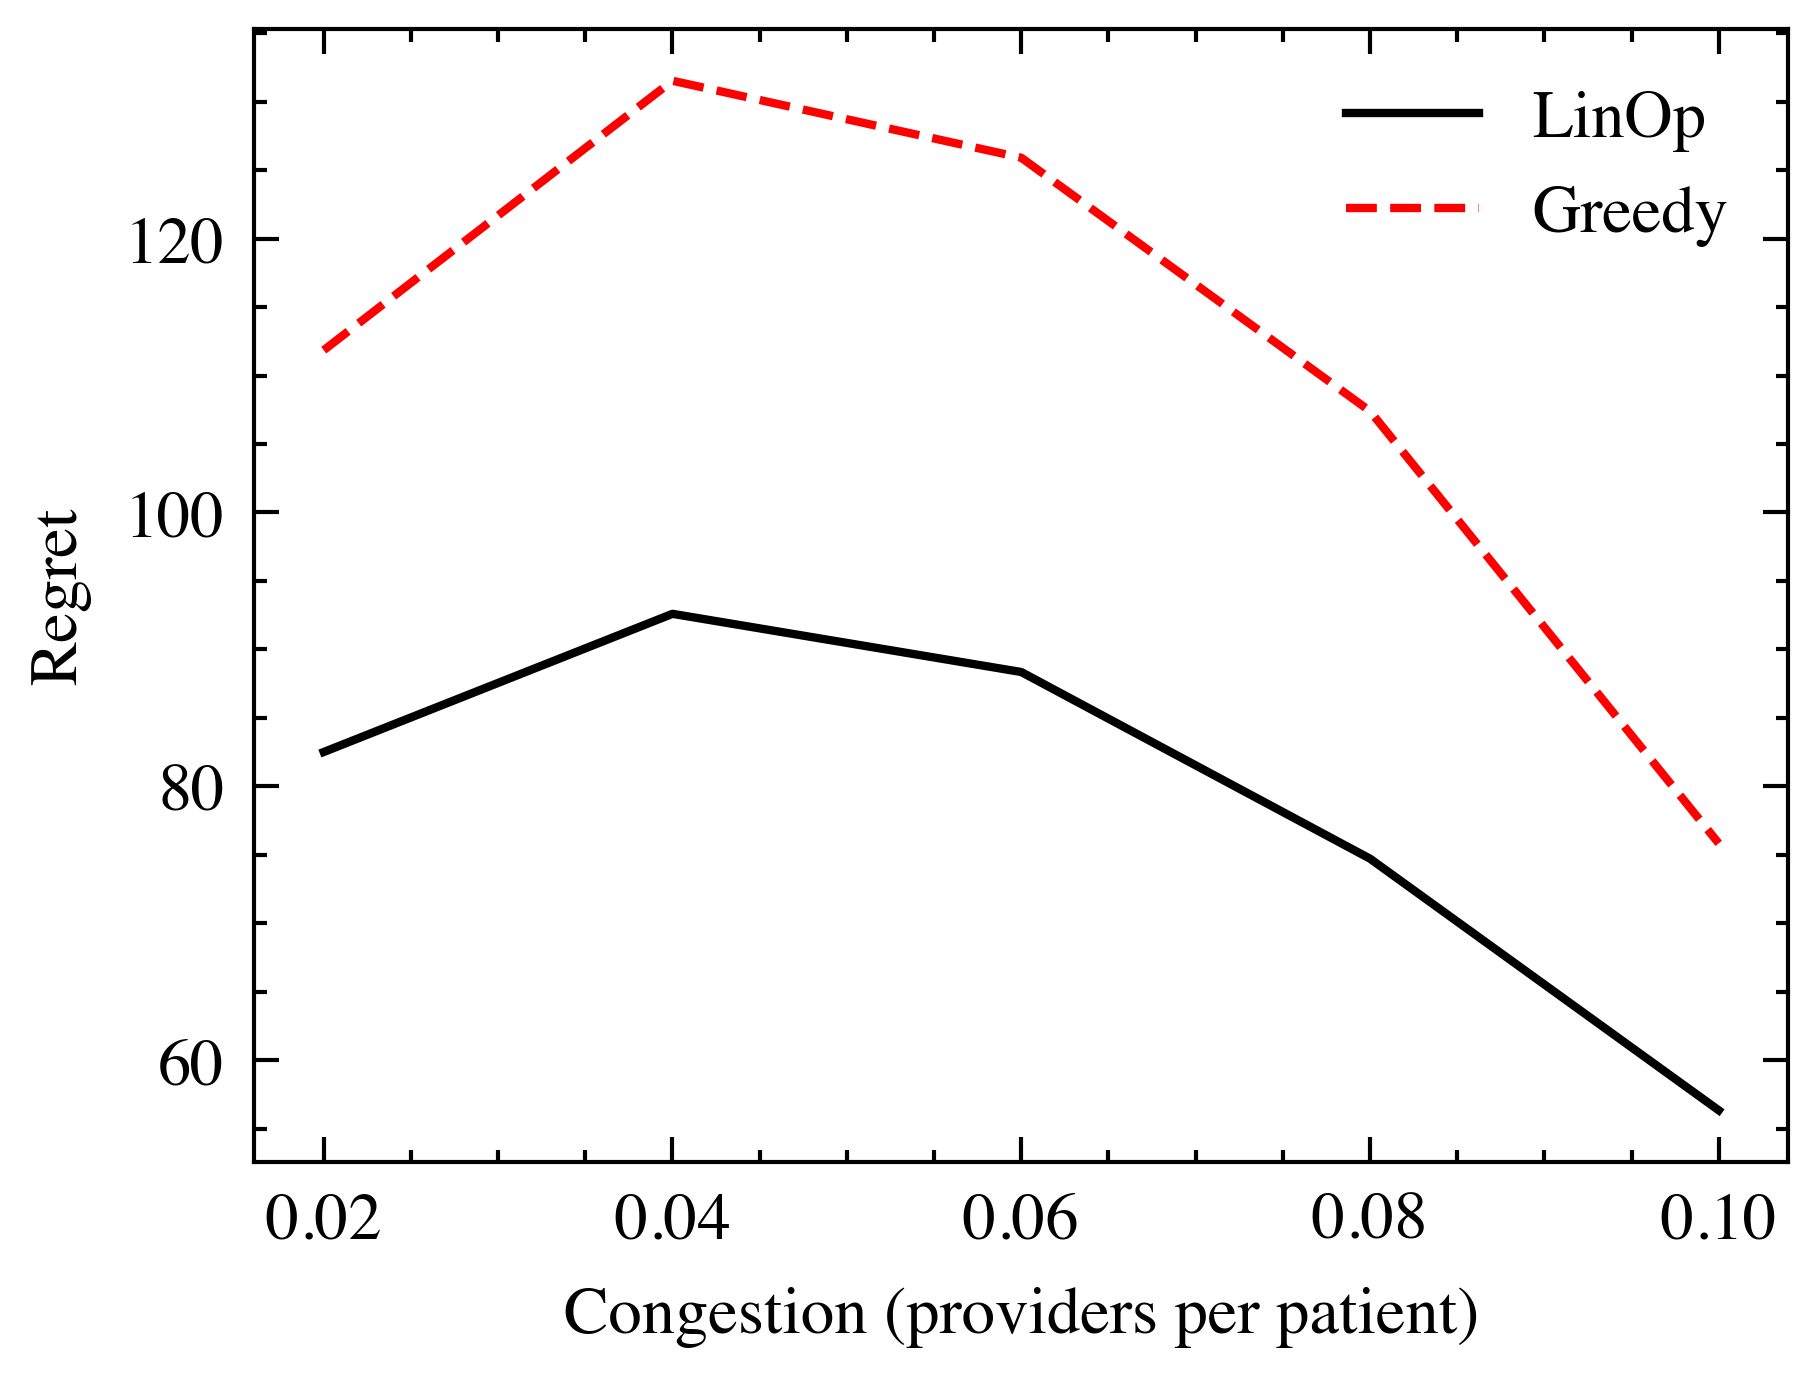

In [17]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(['science', 'ieee', 'no-latex'])
# df_comparison = pd.read_csv("/Users/rdalvi/Documents/linop_vs_greedy.csv")
df_comparison['congestion'] = df_comparison['n_mhps'] / 500.0
df_plt = df_comparison.groupby("congestion").mean()
df_plt[["linop_regret", "greedy_regret"]].plot()
plt.legend(["LinOp", "Greedy"]);
plt.xlabel("Congestion (providers per patient)")
plt.ylabel("Regret")

In [20]:
df_comparison.linop_proportion_of_maximum.describe()

count    250.000000
mean       0.818579
std        0.078748
min        0.506109
25%        0.784191
50%        0.834535
75%        0.876374
max        0.954455
Name: linop_proportion_of_maximum, dtype: float64

### Conclusion

Accross many trials of this experiment, **the linear optimization solution consistently gives lower regret (higher expected number of appointments) than the greedy method**, while honoring the maximum and minimum limits to a reasonable degree

## Appendix


#### A random simulation of Thompson sampling
The code below is not directly related to this research. It is a simulation of Thompson sampling that was used to generate the plots used in the slidedeck.

In [21]:

from scipy.stats import beta, bernoulli
import math

def beta_rvs(row):
    a = row.beta_binom_num_scheduled
    b = row.beta_binom_total - row.beta_binom_num_scheduled
    return pd.Series({'sampling_score': beta.rvs(a+1, b+3), 'expectation': beta.mean(a+1, b+3)})

In [22]:
beta_rvs(pd.Series({'beta_binom_num_scheduled': 0, 'beta_binom_total': 0}))

sampling_score    0.521339
expectation       0.250000
dtype: float64

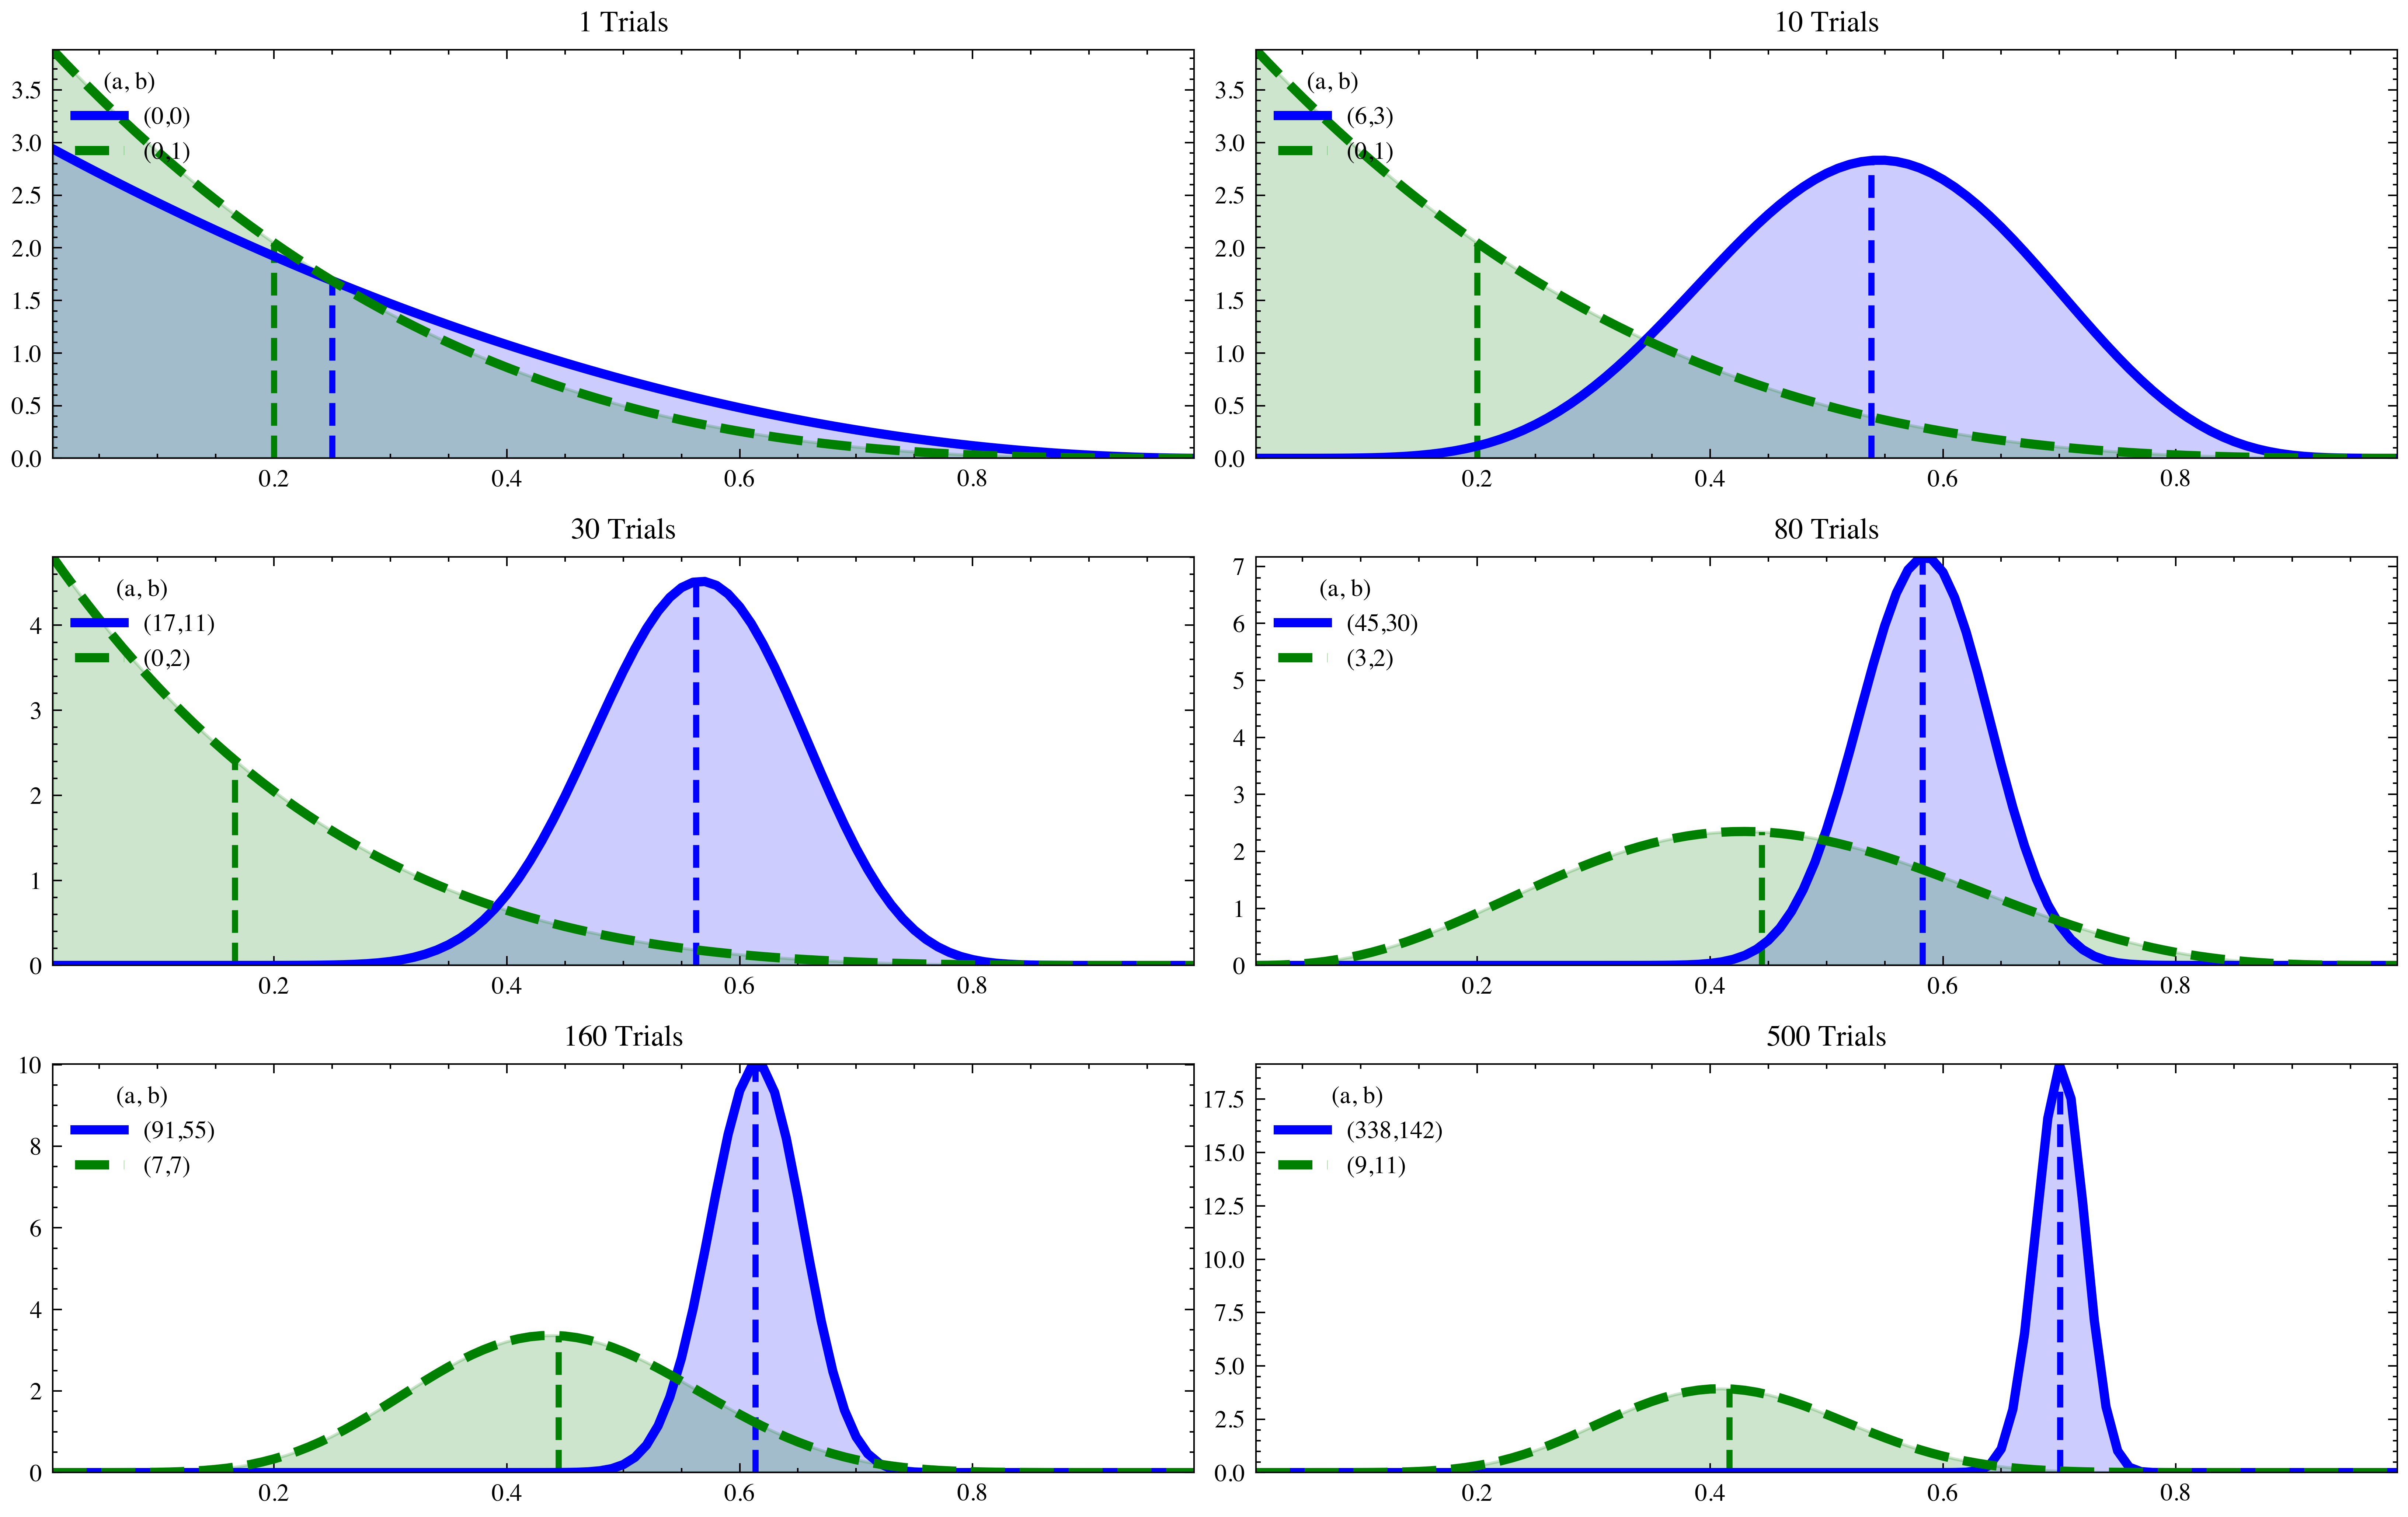

In [23]:
import seaborn as sns
class machine():
    def __init__(self, a, b, p, color):
        self.a = 0
        self.b = 0
        self.p = p
        self.color = color
        
    @property
    def α(self):
        return self.a + 1
    
    @property 
    def β(self):
        return self.b + 3
        
    def reward(self):
        return bernoulli.rvs(p=self.p)
    
    def sample(self):
        return beta.rvs(self.α, self.β)

    def pdf(self, x):
        return beta.pdf(x, self.α, self.β)
        
    def avg(self):
        return self.α/(self.α + self.β)

    
def plot_beta(m):
    x = np.arange (0.01, 1, 0.01)
    y = m.pdf(x)

    
    lines = plt.plot(x, y, label = f"({m.a},{m.b})",lw = 3, color = m.color)
    plt.fill_between(x, 0, y, alpha = 0.2, color = m.color)

    plt.vlines(m.avg(), 0, m.pdf(m.avg()), colors = m.color, linestyles = "--", lw = 2)    
    plt.legend(loc = 'upper left', title="(a, b) ");
    plt.xlim([0, 1])

m1 = machine(0, 0, 0.7, 'blue')
m2 = machine(0, 0, 0.5, 'green')

plt.figure(figsize=(11,7))


k = 0
num_trials = 1001

for i in range(num_trials):

    m = m1 if m1.sample() > m2.sample() else m2
    
    r = m.reward()
    m.a += r
    m.b += (1-r)
    
    if i in [0, 9, 29, 79, 159, 499]:
        plt.subplot(3, 2, k+1)        
        plot_beta(m1)
        plot_beta(m2)
        plt.autoscale(tight = True)
        plt.title(f"{i+1} Trials")
        k += 1
plt.tight_layout()


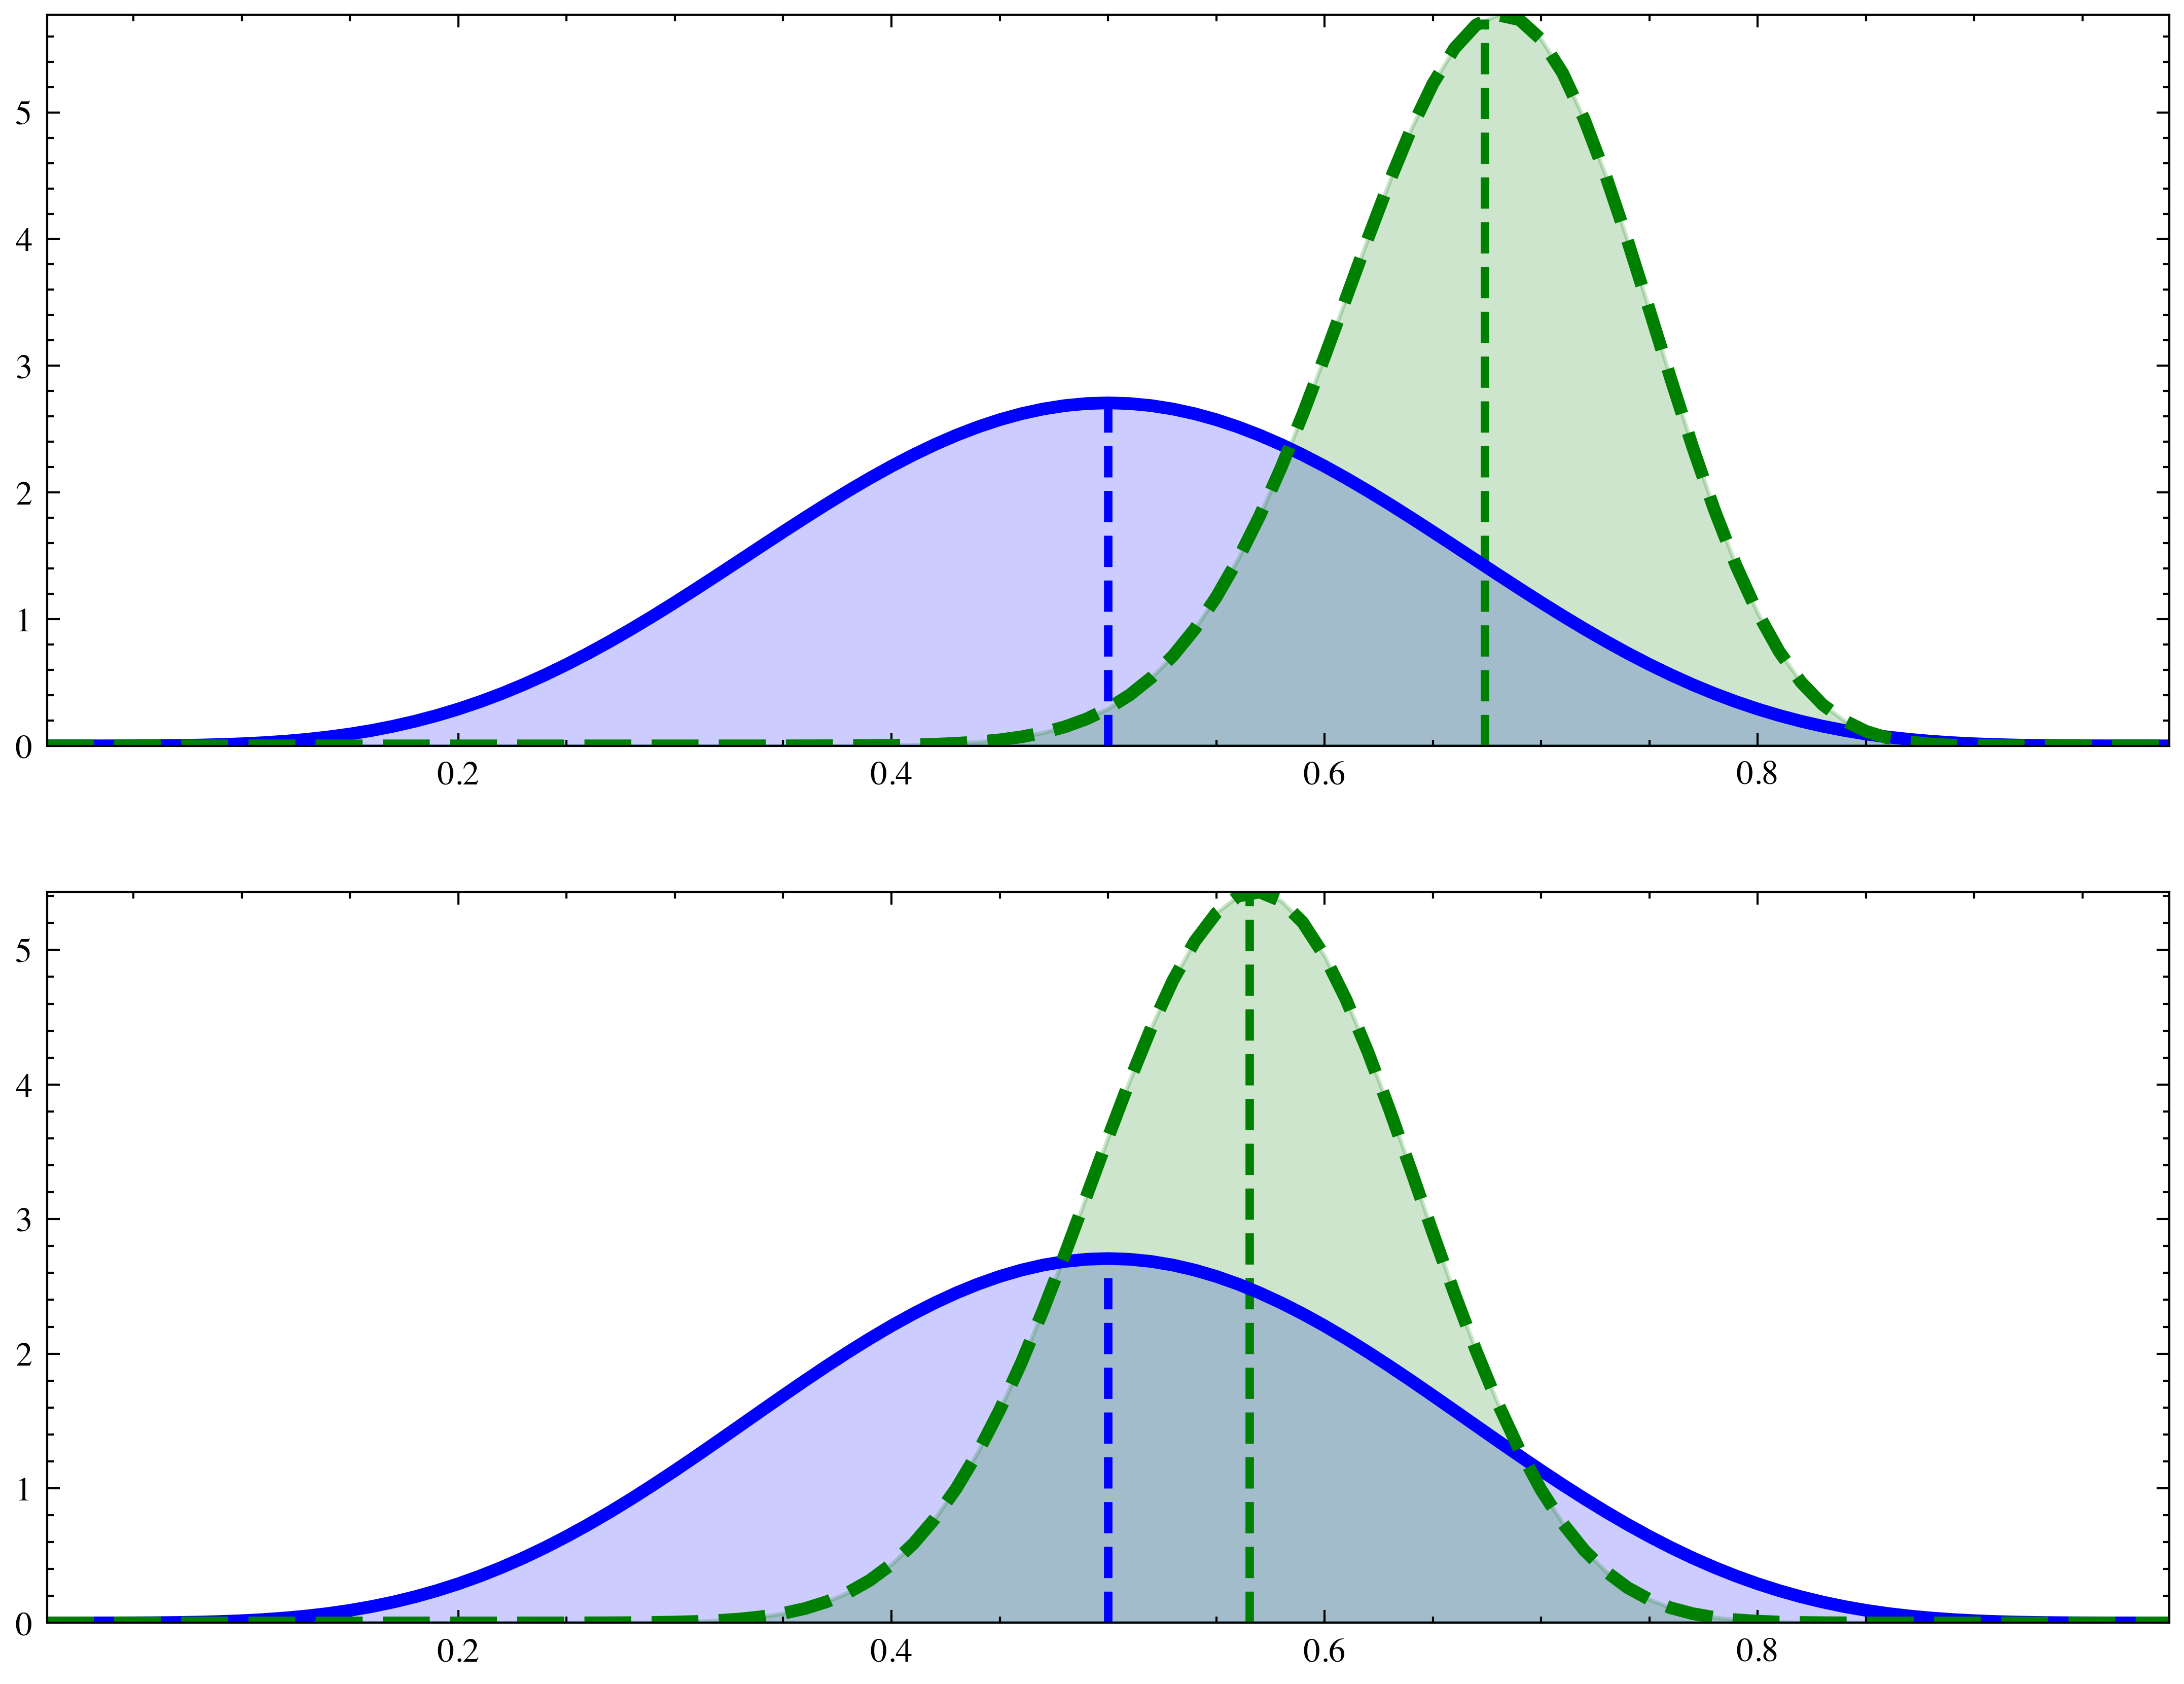

In [24]:
plt.figure(figsize=(9,7))

m3 = machine(0, 0, 0.7, 'blue')
m4 = machine(0, 0, 0.5, 'green')
m3.a = 5
m3.b = 3

m4.a = 30
m4.b = 12
plt.subplot(2, 1, 1)        

plot_beta(m3)
plot_beta(m4)
plt.autoscale(tight = True)
plt.legend('')

m4.a = 25
m4.b = 17
plt.subplot(2, 1, 2)        

plot_beta(m3)
plot_beta(m4)
plt.autoscale(tight = True)
plt.legend('')